#Data Cleaning

In [64]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
import plotly.express as px

# Read in the CSV file and print the first 3 rows of the dataframe
data = pd.read_csv('fifa.csv', skipinitialspace="true")
print(data.head(3).to_string(index=False))
print('\n')

# Print the datatypes of each column in the dataframe
print(data.dtypes)
print('\n')

# Remove any duplicate rows in the dataframe and print the number of NaN values in each column
data.drop_duplicates(inplace=True)
print(data.isna().sum())

# Replace any NaN values with 0.0 and print the number of NaN values in each column again
data.fillna(value=0.0, inplace=True)
print('\n')
print(data.isna().sum())
print('\n')

# Print the first 3 rows of the dataframe again, and drop the 'id' and 'name' columns
print(data.head(3).to_string(index=False))
data.drop(columns=['id', 'name'], inplace=True)
print('\n')
print(data.head(3).to_string(index=False))
print('\n')


    id            name  rating position  height  foot  rare  pace  shooting  passing  dribbling  defending  heading  diving  handling  kicking  reflexes  speed  positioning
  1001    Gábor Király      69       GK     191 Right     0   NaN       NaN      NaN        NaN        NaN      NaN    70.0      66.0     63.0      74.0   35.0         66.0
100143    Frederik Boi      65        M     184 Right     0  61.0      65.0     63.0       59.0       62.0     62.0     NaN       NaN      NaN       NaN    NaN          NaN
100264 Tomasz Szewczuk      57        A     185 Right     0  65.0      54.0     43.0       53.0       55.0     74.0     NaN       NaN      NaN       NaN    NaN          NaN


id               int64
name            object
rating           int64
position        object
height           int64
foot            object
rare             int64
pace           float64
shooting       float64
passing        float64
dribbling      float64
defending      float64
heading        float64
diving 

#Questions 1 : What are the most important characteristics for each position in soccer?

In [68]:

# Create a list of positions, and initialize an empty dataframe to store the mean characteristics for each position
postes = ['GK', 'A', 'D', 'M']
poste_mean = pd.DataFrame(columns=['Caracteristic', 'Mean', 'Position'])

# Initialize an empty dictionary to store the characteristics for each position
poste_carac = {}

# Iterate over each position
for poste in postes:
    # Filter the data for the current position
    # If the position is GK (goalkeeper), select these columns
    # Otherwise, select these columns
    poste_cols = ['diving', 'handling', 'kicking', 'reflexes', 'speed', 'positioning'] if poste == 'GK' else ['pace', 'shooting', 'passing', 'dribbling', 'defending', 'heading']
    poste_data = data[data['position'] == poste][poste_cols]
    
    # Convert string data to float type
    poste_data = poste_data.apply(pd.to_numeric, errors='coerce')
    poste_data_mean = poste_data.mean().nlargest(2)
    
    # Append the two characteristics with the highest mean to the poste_mean DataFrame
    for col_name in poste_data_mean.items():
        poste_mean = poste_mean.append({'Caracteristic': col_name[0], 'Mean': col_name[1], 'Position': poste}, ignore_index=True)

    # Print the two most important characteristics for the position
    print(f"The two most important characteristics for the {poste} position are:")
    print(poste_mean)

    # Plot the histogram using Plotly
    fig = go.Figure()
    for col in poste_cols:
        fig.add_trace(go.Histogram(x=poste_data[col].dropna(), name=col, opacity=0.5, nbinsx=20))

    # Update the layout of the histogram
    fig.update_layout(
        title={"text": f"Histogram of characteristics for the {poste} position", "x": 0.5},
        barmode="overlay",
        xaxis_title="Value",
        yaxis_title="Frequency",
        legend=dict(yanchor="top", y=0.99, xanchor="left", x=0.01),
        plot_bgcolor='rgba(255,255,255,100)',
        paper_bgcolor='rgba(255,255,255,100)',
        xaxis=dict(linecolor='black', linewidth=1, mirror=True),
        yaxis=dict(linecolor='black', linewidth=1, mirror=True)
    )

    # Display the histogram
    fig.show()

#Create a bar chart with all the mean values for each position
fig = px.bar(poste_mean, x="Position", y="Mean", color="Caracteristic", barmode="group", title="Mean values of the two most important characteristics for each position")
fig.update_layout(xaxis_title="Position", yaxis_title="Mean")
fig.show()

The two most important characteristics for the GK position are:
  Caracteristic       Mean Position
0      reflexes  68.865591       GK
1        diving  67.351613       GK


<ipython-input-68-5853fa3f04de>:22: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-68-5853fa3f04de>:22: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



The two most important characteristics for the A position are:
  Caracteristic       Mean Position
0      reflexes  68.865591       GK
1        diving  67.351613       GK
2          pace  72.488473        A
3     dribbling  66.664265        A


<ipython-input-68-5853fa3f04de>:22: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-68-5853fa3f04de>:22: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



The two most important characteristics for the D position are:
  Caracteristic       Mean Position
0      reflexes  68.865591       GK
1        diving  67.351613       GK
2          pace  72.488473        A
3     dribbling  66.664265        A
4     defending  68.069435        D
5       heading  66.837867        D


<ipython-input-68-5853fa3f04de>:22: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-68-5853fa3f04de>:22: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



The two most important characteristics for the M position are:
  Caracteristic       Mean Position
0      reflexes  68.865591       GK
1        diving  67.351613       GK
2          pace  72.488473        A
3     dribbling  66.664265        A
4     defending  68.069435        D
5       heading  66.837867        D
6          pace  68.493916        M
7     dribbling  66.045709        M


<ipython-input-68-5853fa3f04de>:22: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-68-5853fa3f04de>:22: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



#Question 2 : What the correlation is between speed and overall rating based on positions?

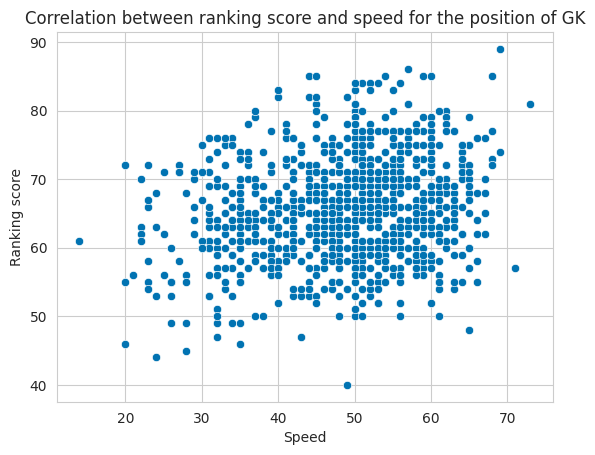

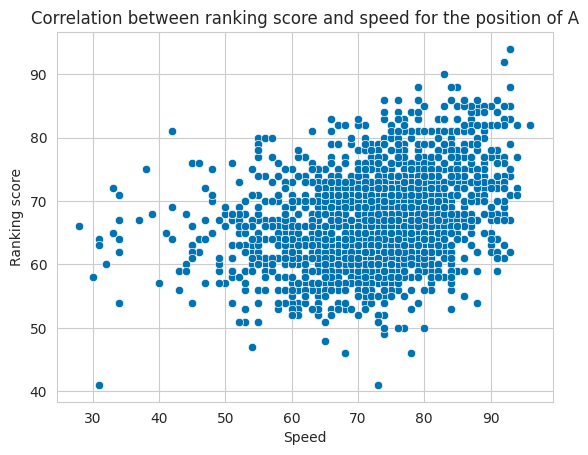

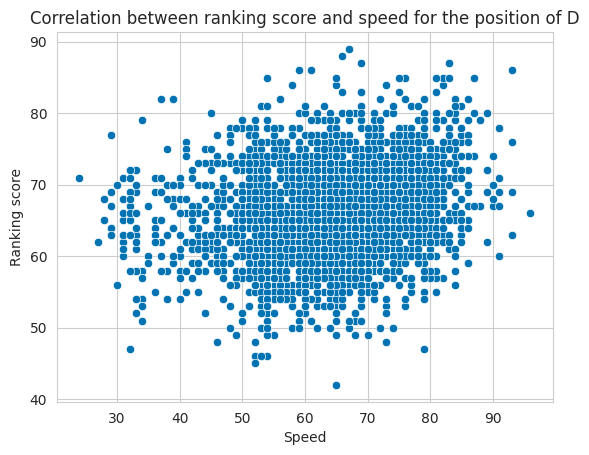

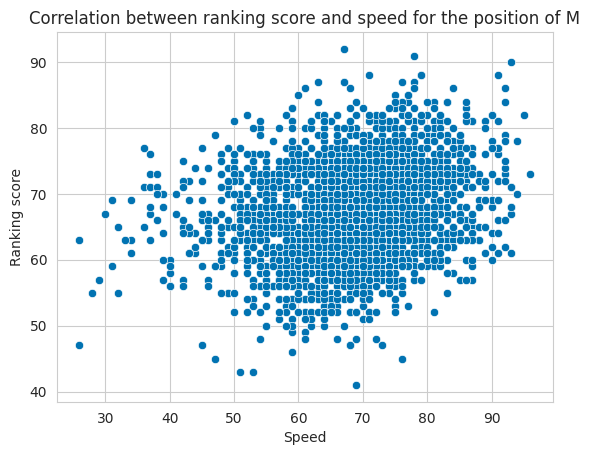

In [69]:
# Créer une liste des postes uniques
positions = ['GK', 'A', 'D', 'M']

# Iterate over positions and generate a graph for each position
for pos in positions:
    # Sélect data for the given position
    if (pos == 'GK'):
      colonne_speed = 'speed'
    if (pos != 'GK'):
      colonne_speed = 'pace'
    
    pos_data = data[data['position'] == pos][['rating', colonne_speed]]
  
    
    pos_data = pos_data.apply(pd.to_numeric, errors='coerce')
    pos_data.dropna(subset=['rating', colonne_speed], inplace=True)

    # Create a scatter plot for the given position
    sns.scatterplot(x=colonne_speed, y='rating', data=pos_data)
    plt.title(f"Correlation between ranking score and speed for the position of {pos}")
    plt.xlabel('Speed')
    plt.ylabel('Ranking score')
    plt.show()

#Question 3 : What are the correlations between the different characteristics of the players?



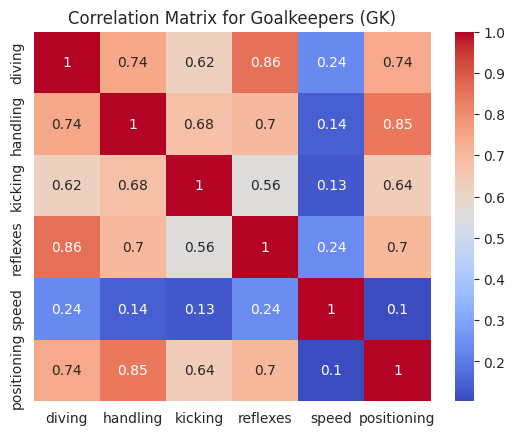

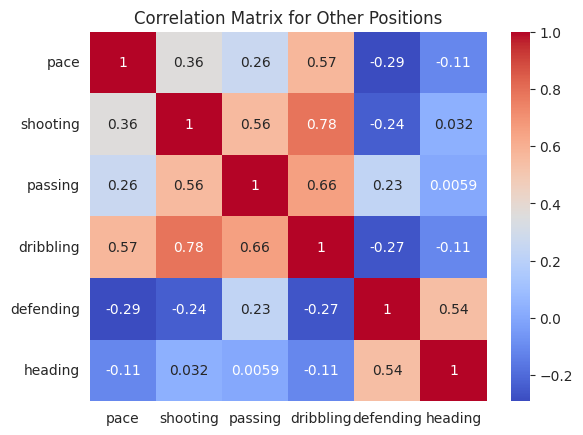

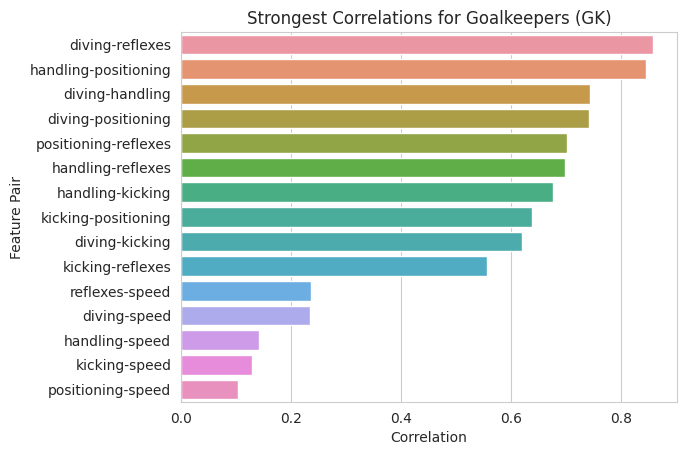

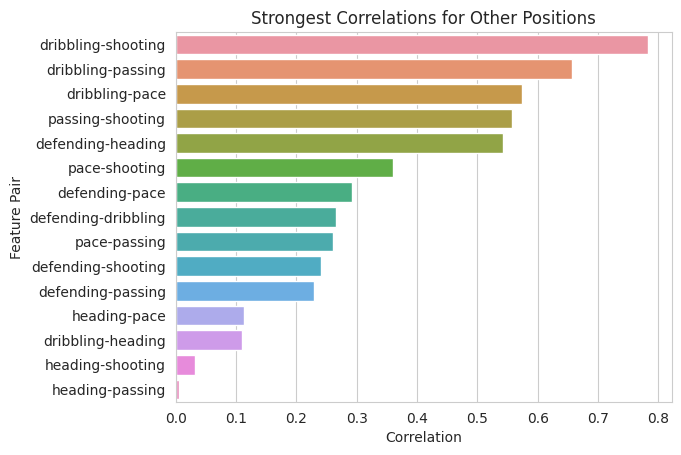

In [70]:
# Filter the data for goalkeepers (GK)
gk_data = data[data['position'] == 'GK'][['diving', 'handling', 'kicking', 'reflexes', 'speed', 'positioning']]
gk_corr = gk_data.corr()

# Display the correlation matrix for goalkeepers (GK)
sns.heatmap(gk_corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix for Goalkeepers (GK)')
plt.show()

# Filter the data for other positions
other_data = data[data['position'] != 'GK'][['pace', 'shooting', 'passing', 'dribbling', 'defending', 'heading']]
other_corr = other_data.corr()

# Display the correlation matrix for other positions
sns.heatmap(other_corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix for Other Positions')
plt.show()

# Select the strongest (positive and negative) correlations
gk_corr_top = gk_corr.abs().unstack().sort_values(ascending=False).reset_index()
gk_corr_top.rename(columns={0:'correlation'}, inplace=True)
gk_corr_top = gk_corr_top[gk_corr_top['level_0'] != gk_corr_top['level_1']]
gk_corr_top = gk_corr_top.assign(feature_pair=gk_corr_top.apply(lambda row: '-'.join(sorted([str(row['level_0']), str(row['level_1'])])), axis=1))

# Transform the DataFrame to long format
gk_corr_top_melted = gk_corr_top.melt(id_vars=['feature_pair'], value_vars=['correlation'])
# Display the strongest correlations as a bar chart
sns.barplot(x='value', y='feature_pair', data=gk_corr_top_melted)
plt.title('Strongest Correlations for Goalkeepers (GK)')
plt.xlabel('Correlation')
plt.ylabel('Feature Pair')
plt.show()

# Select the strongest (positive and negative) correlations
other_corr_top = other_corr.abs().unstack().sort_values(ascending=False).reset_index()
other_corr_top.rename(columns={0:'correlation'}, inplace=True)
other_corr_top = other_corr_top[other_corr_top['level_0'] != other_corr_top['level_1']]
other_corr_top = other_corr_top.assign(feature_pair=other_corr_top.apply(lambda row: '-'.join(sorted([str(row['level_0']), str(row['level_1'])])), axis=1))

# Transform the DataFrame to long format
other_corr_top_melted = other_corr_top.melt(id_vars=['feature_pair'], value_vars=['correlation'])
# Display the strongest correlations as a bar chart
sns.barplot(x='value', y='feature_pair', data=other_corr_top_melted)
plt.title('Strongest Correlations for Other Positions')
plt.xlabel('Correlation')
plt.ylabel('Feature Pair')
plt.show()


#Question 4 : What is the distribution of player rarity based on their strong foot?

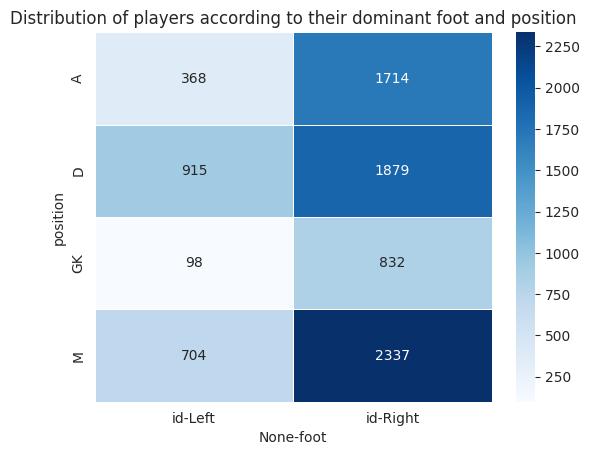

In [71]:
data['id'] = range(1, len(data) + 1)
# Create a pivot table
pivot = pd.pivot_table(data, index=['position'], columns=['foot'], values=['id'], aggfunc='count')

# Visualize the data with a heatmap
sns.heatmap(pivot, cmap='Blues', annot=True, fmt='g', linewidths=.5)

# Show the heatmap title
plt.title('Distribution of players according to their dominant foot and position')

# Create a pivot table for left-footed players
pivot_left = pd.pivot_table(data[data['foot'] == 'Left'], index=['position'], values=['rare'], aggfunc='mean')

# Calculate the percentages of rare players among left-footed players by position
pivot_left['rare_pct'] = pivot_left['rare'] * 100

# Create a pie chart for left-footed players
fig_left = px.pie(pivot_left, values='rare_pct', names=pivot_left.index, title='Percentage of rare players among left-footed players by position')

# Create a pivot table for right-footed players
pivot_right = pd.pivot_table(data[data['foot'] == 'Right'], index=['position'], values=['rare'], aggfunc='mean')

# Calculate the percentages of rare players among right-footed players by position
pivot_right['rare_pct'] = pivot_right['rare'] * 100

# Create a pie chart for right-footed players
fig_right = px.pie(pivot_right, values='rare_pct', names=pivot_right.index, title='Percentage of rare players among right-footed players by position')

#Create a graph to compare the percentages of rare players among left-footed and right-footed players by position
fig = px.histogram(data, x='rare', color='foot', opacity=0.7, barmode='group', title='Comparison of the percentages of rare players among left-footed and right-footed players by position', histnorm='percent')

# Add a legend
fig.update_layout(legend=dict(
    yanchor="top",
    y=0.99,
    xanchor="left",
    x=0.01
))

# Show the graphs
fig_left.show()
fig_right.show()
fig.show()